<a href="https://colab.research.google.com/github/MariaVlasenkova/repo-PNM/blob/main/Analise_MapReduce_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Частотный анализ слов студента в корпусе текстов преподавателя**

In [1]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
from collections import defaultdict
from nltk.corpus import stopwords
import string
!pip install pymorphy2
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 KB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 19.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=30c428e8959a002c59dba0b937a7e9e237834a584c81ee07e30fcd11d58189d4
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [2]:
!rm Analise_Закова.xlsx

rm: cannot remove 'Analise_Закова.xlsx': No such file or directory


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Analise_Закова.xlsx to Analise_Закова.xlsx


In [4]:
df_teach = pd.read_excel("Analise_Закова.xlsx", 'zakova')
df_teach
#print(df_teach)
print(df_teach.count())

KorpusZakova    33236
Frequency       33236
dtype: int64


In [5]:
df_stud = pd.read_excel("Analise_Закова.xlsx", 'truh')
#print(df_stud)
print(df_stud.count())

WordStudent_11    27092
Frequency         27092
dtype: int64


In [6]:
#частота совпадений студента c корпусом данных
df_work=df_stud.copy()
df_student_ok=df_work[df_work.WordStudent_11.isin(df_teach.KorpusZakova)].reset_index(drop=True)
df_student_ok.rename(columns = {'WordStudent_11':'WordSt_11Tch'}, inplace = True)
df_student_ok.rename(columns = {'Frequency':'FrSt_11'}, inplace = True)
print(df_student_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_student_ok.count())

      WordSt_11Tch  FrSt_11
0            ёмкий        1
1             ёлка        2
2             ящик       18
3           ячмень        4
4            яхонт        3
...            ...      ...
15105   абсолютный       17
15106    абсолютно       20
15107        абрам        2
15108    аббатство        2
15109        аббат        8

[15110 rows x 2 columns]
WordSt_11Tch    15110
FrSt_11         15110
dtype: int64


In [7]:
#частота совпадений преподавателя c  словами студента- для определения частоты встречаемости слов у преподавателя, которые использовал студент
df_work2=df_teach.copy()
df_teach_ok=df_work2[df_work2.KorpusZakova.isin(df_stud.WordStudent_11)].reset_index(drop=True)
df_teach_ok.rename(columns = {'KorpusZakova':'WordSt_11Tch'}, inplace = True)
df_teach_ok.rename(columns = {'Frequency':'FrTch'}, inplace = True)
#df_teach_ok.pop('Unnamed: 0')
print(df_teach_ok.sort_values(by ='WordSt_11Tch', ascending = 0).reset_index(drop=True))
print(df_teach_ok.count())

      WordSt_11Tch  FrTch
0            ёмкий      3
1             ёлка      1
2             ящик     14
3           ячмень      1
4            яхонт      1
...            ...    ...
15105   абсолютный     16
15106    абсолютно     22
15107        абрам      1
15108    аббатство     19
15109        аббат     27

[15110 rows x 2 columns]
WordSt_11Tch    15110
FrTch           15110
dtype: int64


In [8]:
#Объединяем частоты студента и преподавателя
res = df_teach_ok.merge(df_student_ok)
res

,WordSt_11Tch,FrTch,FrSt_11
0,мочь,4571,1503
1,человек,3226,633
2,сказать,2617,927
3,время,2616,675
4,говорить,2552,1100
...,...,...,...
15105,дыня,1,1
15106,дыра,1,7
15107,дырка,1,5
15108,дырочка,1,1


In [9]:
from google.colab import files
with pd.ExcelWriter('rezult.xlsx') as writer:
    res.to_excel(writer, sheet_name='res')
files.download('rezult.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
x=res['WordSt_11Tch'].values.tolist()

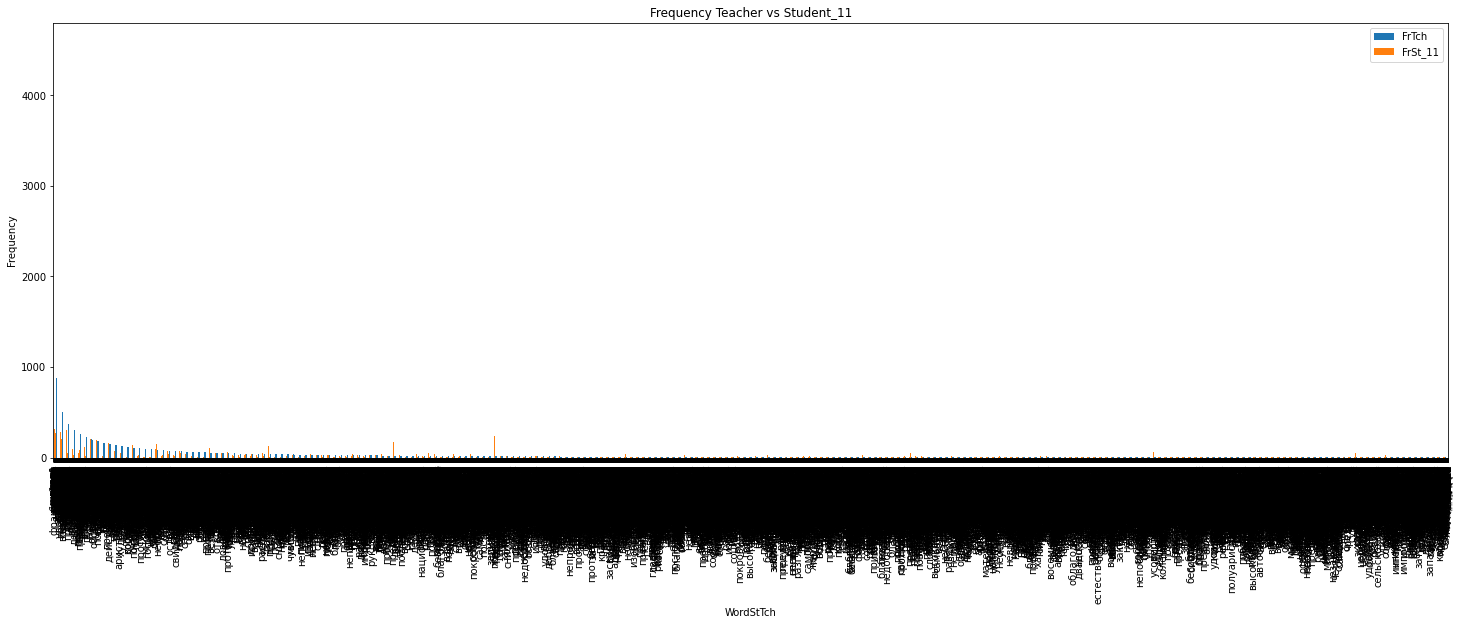

In [11]:
res.plot(kind='bar', figsize=(25,8))
x_pos = [i for i, _ in enumerate(x)]
plt.xlabel("WordStTch")
plt.ylabel("Frequency")
plt.title("Frequency Teacher vs Student_11")
plt.xticks(x_pos, x)
plt.show()

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

(-0.5, 399.5, 199.5, -0.5)

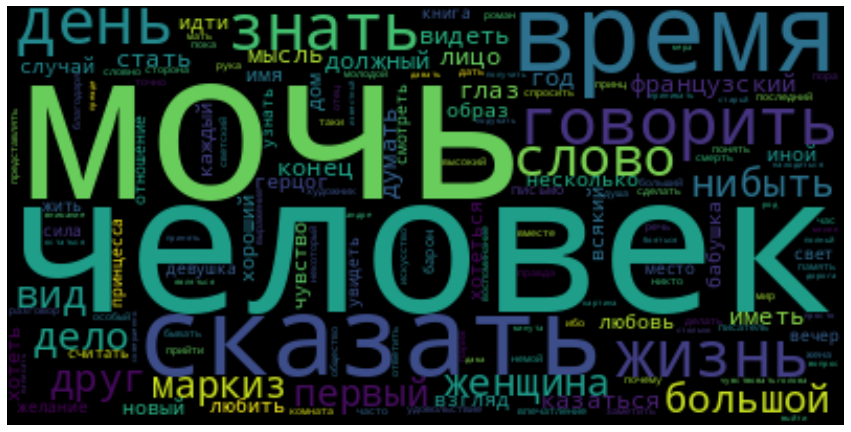

In [13]:
viz=res['WordSt_11Tch'].values.tolist()
text_raw = " ".join(viz)
wordcloud = WordCloud().generate(text_raw)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")